In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import re

In [5]:
import nltk

In [6]:
import string

In [7]:
df = pd.read_csv('Alexa-Dataset - Alexa-Dataset.csv')
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [8]:
df.isnull().sum()

rating               0
date                 0
variation            0
verified_reviews    80
feedback             0
dtype: int64

In [9]:
import seaborn as sns

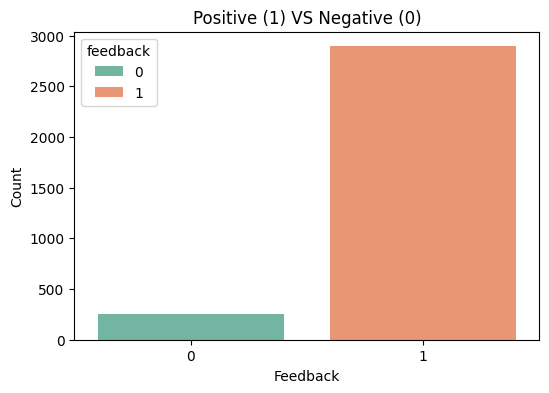

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='feedback',hue='feedback',palette='Set2')
plt.title('Positive (1) VS Negative (0)')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [11]:
alexa_text = df.drop(['rating','date','variation','feedback'],axis=1)

In [12]:
alexa_text

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music
...,...
3145,"Perfect for kids, adults and everyone in betwe..."
3146,"Listening to music, searching locations, check..."
3147,"I do love these things, i have them running my..."
3148,Only complaint I have is that the sound qualit...


In [13]:
alexa_text_lower = alexa_text.apply(lambda x : x.astype(str).str.lower())
alexa_text_lower

,verified_reviews
0,love my echo!
1,loved it!
2,"sometimes while playing a game, you can answer..."
3,i have had a lot of fun with this thing. my 4 ...
4,music
...,...
3145,"perfect for kids, adults and everyone in betwe..."
3146,"listening to music, searching locations, check..."
3147,"i do love these things, i have them running my..."
3148,only complaint i have is that the sound qualit...


In [14]:
df['lower_text'] = alexa_text_lower
df

,rating,date,variation,verified_reviews,feedback,lower_text
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"sometimes while playing a game, you can answer..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing. my 4 ...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,"perfect for kids, adults and everyone in betwe..."
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,"listening to music, searching locations, check..."
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,"i do love these things, i have them running my..."
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,only complaint i have is that the sound qualit...


In [15]:
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree
df['remove_punc'] = df['lower_text'].apply(lambda x : remove_punctuation(x))

In [16]:
df

,rating,date,variation,verified_reviews,feedback,lower_text,remove_punc
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!,love my echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!,loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"sometimes while playing a game, you can answer...",sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing. my 4 ...,i have had a lot of fun with this thing my 4 y...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,music
...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,"perfect for kids, adults and everyone in betwe...",perfect for kids adults and everyone in between
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,"listening to music, searching locations, check...",listening to music searching locations checkin...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,"i do love these things, i have them running my...",i do love these things i have them running my ...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,only complaint i have is that the sound qualit...,only complaint i have is that the sound qualit...


In [17]:
EMOTICONS = [':-<',':->']
def remove_emoticons(text):
    emoticonpattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS)+u')')
    return emoticonpattern.sub('r',text)
df['remove_emoticon'] = df['lower_text'].astype(str).apply(remove_emoticons)

In [18]:
df

,rating,date,variation,verified_reviews,feedback,lower_text,remove_punc,remove_emoticon
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!,love my echo,love my echo!
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!,loved it,loved it!
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"sometimes while playing a game, you can answer...",sometimes while playing a game you can answer ...,"sometimes while playing a game, you can answer..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing. my 4 ...,i have had a lot of fun with this thing my 4 y...,i have had a lot of fun with this thing. my 4 ...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,music,music
...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,"perfect for kids, adults and everyone in betwe...",perfect for kids adults and everyone in between,"perfect for kids, adults and everyone in betwe..."
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,"listening to music, searching locations, check...",listening to music searching locations checkin...,"listening to music, searching locations, check..."
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,"i do love these things, i have them running my...",i do love these things i have them running my ...,"i do love these things, i have them running my..."
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,only complaint i have is that the sound qualit...,only complaint i have is that the sound qualit...,only complaint i have is that the sound qualit...


In [19]:
def tokenization(text):
    token = re.split('W+',text)
    return token
df['tokenized_string'] = df['lower_text'].apply(lambda x: tokenization(x))
df

,rating,date,variation,verified_reviews,feedback,lower_text,remove_punc,remove_emoticon,tokenized_string
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!,love my echo,love my echo!,[love my echo!]
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!,loved it,loved it!,[loved it!]
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"sometimes while playing a game, you can answer...",sometimes while playing a game you can answer ...,"sometimes while playing a game, you can answer...","[sometimes while playing a game, you can answe..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing. my 4 ...,i have had a lot of fun with this thing my 4 y...,i have had a lot of fun with this thing. my 4 ...,[i have had a lot of fun with this thing. my 4...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,music,music,[music]
...,...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,"perfect for kids, adults and everyone in betwe...",perfect for kids adults and everyone in between,"perfect for kids, adults and everyone in betwe...","[perfect for kids, adults and everyone in betw..."
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,"listening to music, searching locations, check...",listening to music searching locations checkin...,"listening to music, searching locations, check...","[listening to music, searching locations, chec..."
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,"i do love these things, i have them running my...",i do love these things i have them running my ...,"i do love these things, i have them running my...","[i do love these things, i have them running m..."
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,only complaint i have is that the sound qualit...,only complaint i have is that the sound qualit...,only complaint i have is that the sound qualit...,[only complaint i have is that the sound quali...


In [20]:
from nltk.corpus import stopwords

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rawat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
",".join(stopwords.words('english'))

"a,about,above,after,again,against,ain,all,am,an,and,any,are,aren,aren't,as,at,be,because,been,before,being,below,between,both,but,by,can,couldn,couldn't,d,did,didn,didn't,do,does,doesn,doesn't,doing,don,don't,down,during,each,few,for,from,further,had,hadn,hadn't,has,hasn,hasn't,have,haven,haven't,having,he,he'd,he'll,her,here,hers,herself,he's,him,himself,his,how,i,i'd,if,i'll,i'm,in,into,is,isn,isn't,it,it'd,it'll,it's,its,itself,i've,just,ll,m,ma,me,mightn,mightn't,more,most,mustn,mustn't,my,myself,needn,needn't,no,nor,not,now,o,of,off,on,once,only,or,other,our,ours,ourselves,out,over,own,re,s,same,shan,shan't,she,she'd,she'll,she's,should,shouldn,shouldn't,should've,so,some,such,t,than,that,that'll,the,their,theirs,them,themselves,then,there,these,they,they'd,they'll,they're,they've,this,those,through,to,too,under,until,up,ve,very,was,wasn,wasn't,we,we'd,we'll,we're,were,weren,weren't,we've,what,when,where,which,while,who,whom,why,will,with,won,won't,wouldn,wouldn't,y,you,you'd,you

In [23]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['rem_stopword'] = df['lower_text'].apply(lambda x:remove_stopwords(x))

In [24]:
df

,rating,date,variation,verified_reviews,feedback,lower_text,remove_punc,remove_emoticon,tokenized_string,rem_stopword
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!,love my echo,love my echo!,[love my echo!],love echo!
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!,loved it,loved it!,[loved it!],loved it!
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"sometimes while playing a game, you can answer...",sometimes while playing a game you can answer ...,"sometimes while playing a game, you can answer...","[sometimes while playing a game, you can answe...","sometimes playing game, answer question correc..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing. my 4 ...,i have had a lot of fun with this thing my 4 y...,i have had a lot of fun with this thing. my 4 ...,[i have had a lot of fun with this thing. my 4...,"lot fun thing. 4 yr old learns dinosaurs, cont..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,music,music,[music],music
...,...,...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,"perfect for kids, adults and everyone in betwe...",perfect for kids adults and everyone in between,"perfect for kids, adults and everyone in betwe...","[perfect for kids, adults and everyone in betw...","perfect kids, adults everyone between!!"
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,"listening to music, searching locations, check...",listening to music searching locations checkin...,"listening to music, searching locations, check...","[listening to music, searching locations, chec...","listening music, searching locations, checking..."
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,"i do love these things, i have them running my...",i do love these things i have them running my ...,"i do love these things, i have them running my...","[i do love these things, i have them running m...","love things, running entire home, tv, lights, ..."
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,only complaint i have is that the sound qualit...,only complaint i have is that the sound qualit...,only complaint i have is that the sound qualit...,[only complaint i have is that the sound quali...,complaint sound quality great. mostly use comm...
